In [1]:
import pandas as pd

# Library tools to turn text in to interpretable DataFrames
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
# Object that uses count vectorizer and Logistic Regrssion as one
from sklearn.pipeline import Pipeline
# Split data to check train model, Input parameters to create best model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import stop_words
from sklearn import metrics

# Importing lemmatizer.
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
          
# Importing stemmer.
from nltk.stem.porter import PorterStemmer

# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

# Naive Bayes Models 
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# Importing plotting functions
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [2]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor, \
GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, \
AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [4]:
df = pd.read_csv('./datasets/Strange Planet.csv')

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
# Instantiating
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
p_stemmer = PorterStemmer()

def word_analysis(df):
    # Adding columns to DataFrame
    df['stem_text_1'] = None
    df['stem_text_2'] = None
    df['stem_text_3'] = None
    df['stem_text_4'] = None
    df['word_count_1'] = None
    df['word_count_2'] = None
    df['word_count_3'] = None
    df['word_count_4'] = None
    df['desc_word_loc'] = None
    df['desc_panel'] = None
    
    # Looping through each comic
    for i in range(df.shape[0]):
        # Looking throuhg each panel
        desc = df['word'][i]
        df['desc_word_loc'][i] = []
        df['desc_panel'][i] = []
        print(i)
        
        for pan in range(1,5):
            key = "panel_" + str(pan)
            panel = df[key][i]
            key2 = "word_count_" + str(pan)

            if type(panel) != str:
                df[key2][i] = 0
                df[key][i] = ' '
                df[key3][i] = ' '
            else:
                tokens = tokenizer.tokenize(panel) 
                count = len(tokens)
            
                df[key2][i] = count
            
                key3 = "stem_text_" + str(pan)
            
                new_post_stem = ' '
        
                for a, token in enumerate(tokens):
                    if token.lower() == desc.lower():
                        df['desc_panel'][i].append(pan)
                        word_loc = a+1
                        b = pan
                        while b > 1:
                            keyi = 'word_count_' + str(b-1)
                            word_loc += df[keyi][i]
                            b-=1
                            
                        df['desc_word_loc'][i].append(word_loc)
                
                    stem = p_stemmer.stem(token)
                    new_post_stem += ' ' + stem

                df[key3][i] = new_post_stem
            
    return df

In [7]:
df = word_analysis(df)

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0


/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1


/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136


In [8]:
df['all_words'] = df['panel_1'] + df['panel_2'] + df['panel_3'] + df['panel_4']
df['word_count'] = df['word_count_1'] + df['word_count_2'] + df['word_count_3'] + df['word_count_4']

In [9]:
df['loc_percent'] = None
for i in range(df.shape[0]):
    df['loc_percent'][i] = []
    for loc in df['desc_word_loc'][i]:
        df['loc_percent'][i].append((loc-1)/df['word_count'][i])

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df.head()

,panel_1,panel_2,panel_3,panel_4,characters,word,stem_text_1,stem_text_2,stem_text_3,stem_text_4,word_count_1,word_count_2,word_count_3,word_count_4,desc_word_loc,desc_panel,all_words,word_count,loc_percent
0,Why should we employ you? I excel at many acti...,Did you ask another being to compliment you? Y...,This being says you are energetic…. I emit ene...,…but also practical. I am a low-to-planet being,2,Employ,whi should we employ you I excel at mani activ,did you ask anoth be to compliment you ye he...,thi be say you are energet I emit energi,but also practic I am a low to planet be,10,14,9,10,[4],[1],Why should we employ you? I excel at many acti...,43,[0.06976744186046512]
1,"My home, my regulations. Sweet disks",,Ew,"Lifegiver, you were correct.",1,Regulations,,None,Ew,lifegiv you were correct,6,0,1,4,[4],[1],"My home, my regulations. Sweet disks EwLifegiv...",11,[0.2727272727272727]
2,"Ingest a minuscule portion? Ok, but I am only ...","Wonderful, so am I.",Hahaha Hahaha,What a delightful interaction. Less so for me ...,2,Repetition,ingest a minuscul portion Ok but I am onli f...,wonder so am I,hahaha hahaha,what a delight interact less so for me becau...,14,4,2,10,[30],[4],"Ingest a minuscule portion? Ok, but I am only ...",30,[0.9666666666666667]
3,I am ready to observe your festive disguises.,I am unsettled. Because mortality is unsettling.,I am a humorous being. I feel dread.,Let me comfort you with comedy. I prefer morta...,3,Dread,I am readi to observ your festiv disguis,I am unsettl becaus mortal is unsettl,I am a humor be I feel dread,let me comfort you with comedi I prefer mortal,8,7,8,9,[23],[3],I am ready to observe your festive disguises.I...,32,[0.6875]
4,Cease. Plummet. Rotate.,Rotate until you are extinguished.,How frequently will we do this? Almost certain...,But you will recall this until the day you per...,2,Extinguished,ceas plummet rotat,rotat until you are extinguish,how frequent will we do thi almost certainli...,but you will recal thi until the day you perish,3,5,9,10,[8],[2],Cease. Plummet. Rotate. Rotate until you are e...,27,[0.25925925925925924]


In [11]:
word_locs=[]
word_pans=[]
pan_locs=[]
loc_percents = []

for i in range(df.shape[0]):
    for a, pan in enumerate(df.desc_panel[i]):
        desc = df.desc_word_loc[i][a]
        while pan>1:
            desc -=df['word_count_'+str(pan)][i]
            pan-=1
        pan_locs.append(desc)
    word_locs.extend(df.desc_word_loc[i])
    word_pans.extend(df.desc_panel[i])
    loc_percents.extend(df.loc_percent[i])
    
pan_1_locs = []
pan_2_locs = []
pan_3_locs = []
pan_4_locs = []

for i, loc in enumerate(pan_locs):
    if word_pans[i]==1:
        pan_1_locs.append(loc)
    elif word_pans[i]==2:
        pan_2_locs.append(loc)
    elif word_pans[i]==3:
        pan_3_locs.append(loc)
    else:
        pan_4_locs.append(loc)

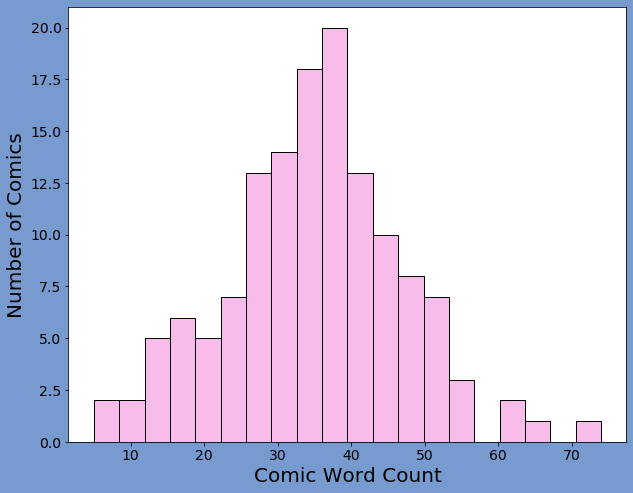

In [12]:
plt.figure(figsize=(10,8), facecolor='#779BCF', clear=True)
plt.hist(df.word_count, bins=20, color='#F7BCEA', edgecolor='black')
plt.xlabel('Comic Word Count', fontsize=20)
plt.ylabel('Number of Comics', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

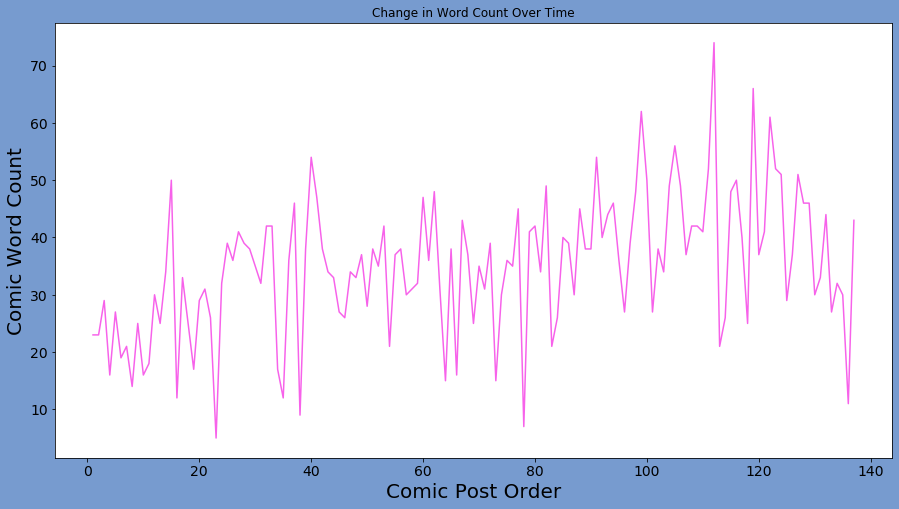

In [14]:
plt.figure(figsize=(15, 8), facecolor='#779BCF', clear=True)
plt.plot(list(reversed(range(1,138))), df.word_count, color='#F762EA')
plt.xlabel('Comic Post Order', fontsize=20)
plt.ylabel('Comic Word Count', fontsize=20)
plt.title('Change in Word Count Over Time')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

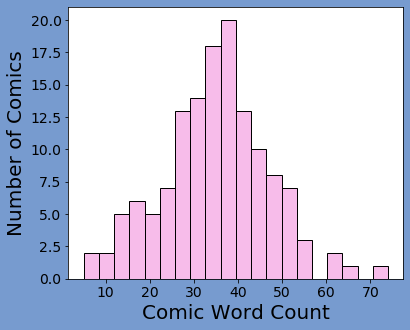

In [15]:
plt.figure(figsize=(6, 5), facecolor='#779BCF', clear=True)
plt.hist(df.word_count, bins=20, color='#F7BCEA', edgecolor='black')
#plt.hist(word_locs, bins=20, color='#C089E6', edgecolor='black', alpha=.6)
plt.xlabel('Comic Word Count', fontsize=20)
plt.ylabel('Number of Comics', fontsize=20)
#plt.legend(['Overall Word Count', 'Word Count Location of Description'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [16]:
df.groupby('word_count_3').word_count_3.count().sum()

137

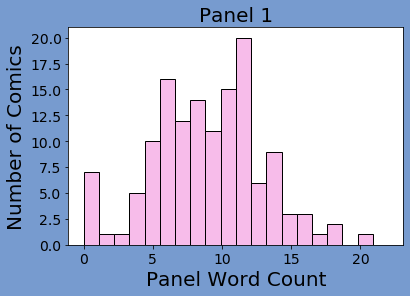

In [17]:
plt.figure(figsize=(6,4), facecolor='#779BCF', clear=True)
plt.hist(df.word_count_1, bins=20, color='#F7BCEA', range=(0,22), edgecolor='black')
#plt.hist(pan_1_locs, bins=20, color='#C089E6', range=(0,22), edgecolor='black', alpha=.6)
plt.xlabel('Panel Word Count', fontsize=20)
plt.ylabel('Number of Comics', fontsize=20)
plt.title('Panel 1', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

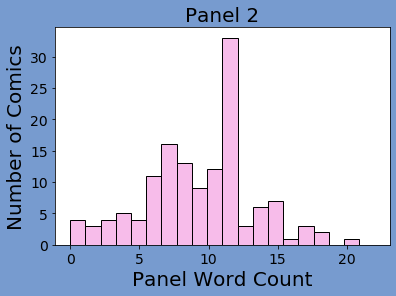

In [18]:
plt.figure(figsize=(6,4), facecolor='#779BCF', clear=True)
plt.hist(df.word_count_2, bins=20, color='#F7BCEA', range=(0,22), edgecolor='black')
#plt.hist(pan_2_locs, bins=20, color='#C089E6', range=(0,22), edgecolor='black', alpha=.6)
plt.xlabel('Panel Word Count', fontsize=20)
plt.ylabel('Number of Comics', fontsize=20)
plt.title('Panel 2', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

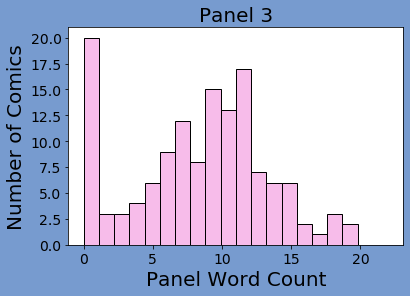

In [19]:
plt.figure(figsize=(6,4), facecolor='#779BCF', clear=True)
plt.hist(df.word_count_3, bins=20, color='#F7BCEA', range=(0,22), edgecolor='black')
#plt.hist(pan_3_locs, bins=20, color='#C089E6', range=(0,22), edgecolor='black', alpha=.6)
plt.xlabel('Panel Word Count', fontsize=20)
plt.ylabel('Number of Comics', fontsize=20)
plt.title('Panel 3', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

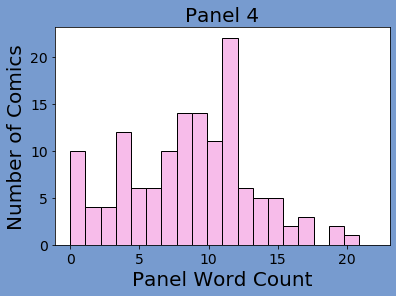

In [20]:
plt.figure(figsize=(6,4), facecolor='#779BCF', clear=True)
plt.hist(df.word_count_4, bins=20, color='#F7BCEA', range=(0,22), edgecolor='black')
#plt.hist(pan_4_locs, bins=20, color='#C089E6', range=(0,22), edgecolor='black', alpha=.6)
plt.xlabel('Panel Word Count', fontsize=20)
plt.ylabel('Number of Comics', fontsize=20)
plt.title('Panel 4', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

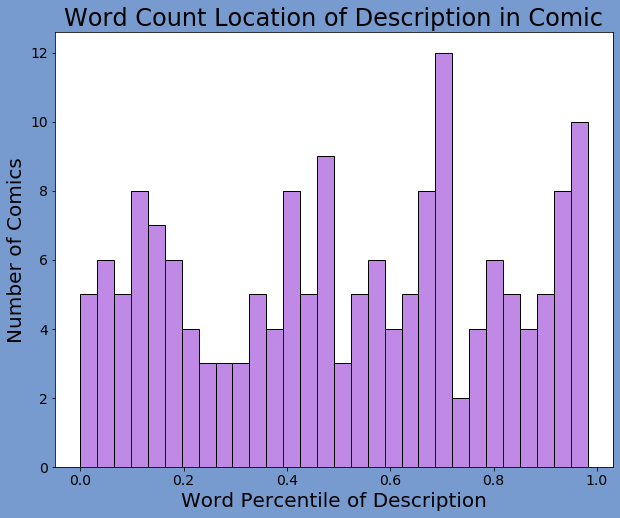

In [21]:
plt.figure(figsize=(10,8), facecolor='#779BCF', clear=True)
plt.hist(loc_percents, bins=30, color='#C089E6', edgecolor='black')
plt.xlabel('Word Percentile of Description', fontsize=20)
plt.ylabel('Number of Comics', fontsize=20)
plt.title('Word Count Location of Description in Comic', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

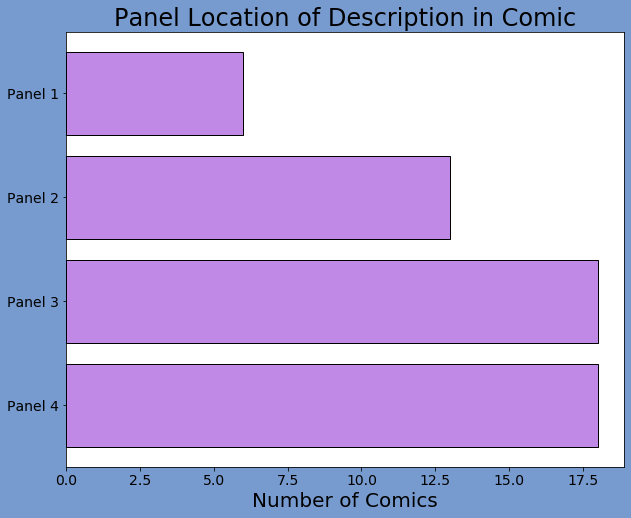

In [22]:
plt.figure(figsize=(10,8), facecolor='#779BCF', clear=True)
plt.barh(range(4), [pan_locs.count(4),
          pan_locs.count(3),
          pan_locs.count(2),
          pan_locs.count(1)], color='#C089E6', edgecolor='black')
plt.xlabel('Number of Comics', fontsize=20)
#plt.ylabel('Panel', fontsize=20)
plt.title('Panel Location of Description in Comic', fontsize=24)
plt.yticks([0, 1, 2, 3], ['Panel 4','Panel 3','Panel 2', 'Panel 1'], fontsize=14)
plt.xticks(fontsize=14);

In [23]:
pan_locs.count(1)

6

In [24]:
vect = CountVectorizer(max_df=0.87, max_features=5000, min_df=1, ngram_range=(1,1), stop_words='english')
vect.fit(df.all_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.87, max_features=5000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
word_freq = vect.transform(df.all_words)

In [26]:
word_freq_cv = pd.DataFrame(word_freq.toarray(),
                                 columns = vect.get_feature_names())

words_df = pd.DataFrame(word_freq_cv.sum(), index = vect.get_feature_names(), columns =['count'])

In [27]:
words_df.drop(['just', 'll', 'does', 'did'], inplace=True)

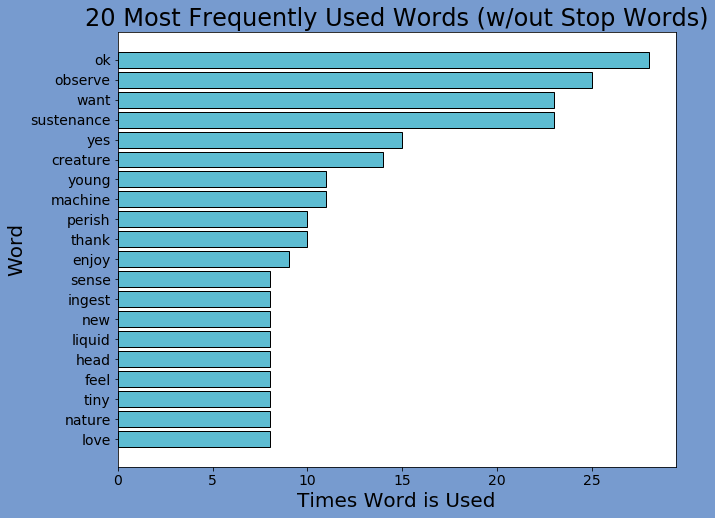

In [28]:
plt.figure(figsize=(10,8), facecolor='#779BCF', clear=True)
plt.barh(range(20), words_df.sort_values('count').tail(20)['count'], color='#5DBCD2', edgecolor='black')
plt.xlabel('Times Word is Used', fontsize=20)
plt.ylabel('Word', fontsize=20)
plt.title('20 Most Frequently Used Words (w/out Stop Words)', fontsize=24)
plt.yticks(range(20), words_df.sort_values('count').tail(20).index, fontsize=14)
plt.xticks(fontsize=14);

In [29]:
words_df['length'] = None

for i, row in words_df.iterrows():
    words_df['length'][i] = len(i)


/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
df['word_len'] = None

for i in range(df.shape[0]):
    df['word_len'][i] = len(df['word'][i])

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
df.groupby('word_len')['word_len'].count().sum()/df.groupby('word_len')['word_len'].count().count()

13.7

In [32]:
words_df.groupby('length')['count'].count()

length
2       7
3      49
4     141
5     174
6     198
7     190
8     162
9     144
10     88
11     52
12     22
13     21
14      2
16      1
17      1
Name: count, dtype: int64

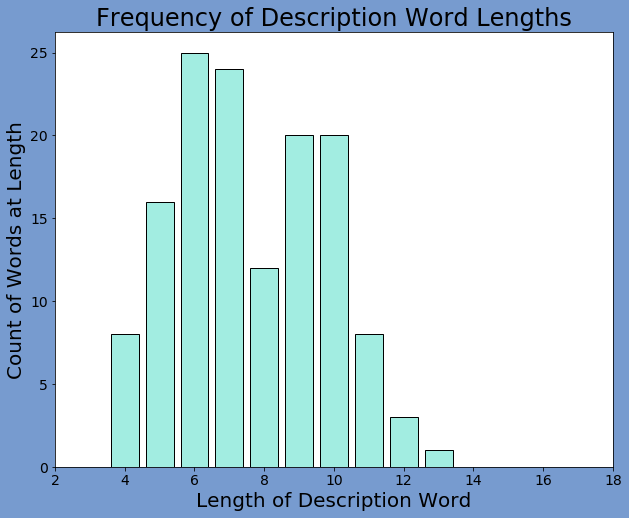

In [33]:
plt.figure(figsize=(10,8), facecolor='#779BCF', clear=True)
plt.bar(df.groupby('word_len')['word_len'].count().index, 
         df.groupby('word_len')['word_len'].count(), color='#A2EDE1', edgecolor='black')
plt.xlabel('Length of Description Word', fontsize=20)
plt.ylabel('Count of Words at Length', fontsize=20)
plt.title('Frequency of Description Word Lengths', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=14);

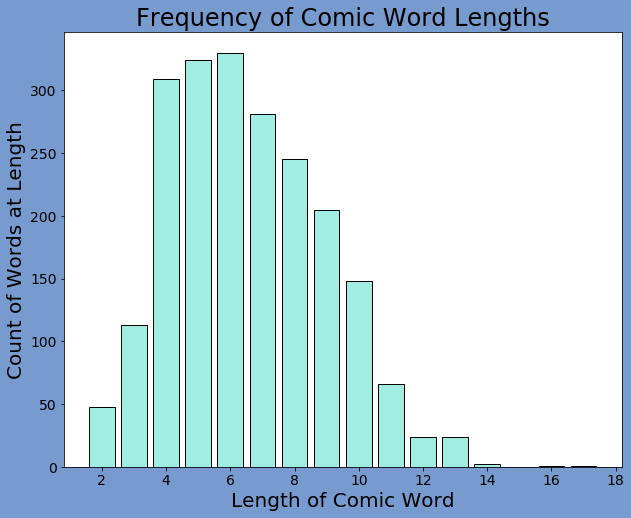

In [34]:
plt.figure(figsize=(10,8), facecolor='#779BCF', clear=True)
plt.bar(words_df.groupby('length')['count'].sum().index, 
         words_df.groupby('length')['count'].sum(), color='#A2EDE1', edgecolor='black')
plt.xlabel('Length of Comic Word', fontsize=20)
plt.ylabel('Count of Words at Length', fontsize=20)
plt.title('Frequency of Comic Word Lengths', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=14);

In [35]:
df['comic_ppos'] = None
df['word_ppos'] = None

for i in range(df.shape[0]):
    opinion = TextBlob(df['word'][i], analyzer=NaiveBayesAnalyzer())
    sent = opinion.sentiment
    df['word_ppos'][i] = sent.p_pos
    
    opinion = TextBlob(df['all_words'][i], analyzer=NaiveBayesAnalyzer())
    sent = opinion.sentiment
    df['comic_ppos'][i] = sent.p_pos

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [410]:
df['1st_loc_percent'] = None
df['1st_loc_panel'] = None
df['1st_loc_word'] = None

for i in range(df.shape[0]):
    percents = df['loc_percent'][i]
    df['1st_loc_percent'] = percents[0]
    panel = df['desc_panel'][i]
    df['1st_loc_panel'] = panel[0]
    word = df['desc_word_loc'][i]
    df['1st_loc_word'] = word[0]
    

In [514]:
df.tail()

,panel_1,panel_2,panel_3,panel_4,characters,word,stem_text_1,stem_text_2,stem_text_3,stem_text_4,...,desc_panel,all_words,word_count,loc_percent,comic_ppos,word_ppos,1st_loc_percent,1st_loc_panel,1st_loc_word,word_len
133,Now you possess this. So unnecessary.,I want to observe concealment destruction. Now?,Destroy the concealment. It’s so beautiful.,"Destroy now, I want to observe. Ok.",2,Destroy,now you possess thi So unnecessari,I want to observ conceal destruct now,destroy the conceal It s so beauti,destroy now I want to observ Ok,...,"[3, 4]",Now you possess this. So unnecessary. I want t...,27,"[0.48148148148148145, 0.7407407407407407]",0.523794,0.513699,0.130435,1,4,7
134,Our new being weighs 9 lbs. Weighty. Such Heft.,,But how long?,Significant. A length being.,5,Weighty,,None,but how long,signific A length be,...,[1],Our new being weighs 9 lbs. Weighty. Such Heft...,16,[0.375],0.523742,0.4375,0.130435,1,4,7
135,When I consume frozen thickness quickly I sens...,"Yes, I feel mmmm but also nnnn.",Yet I am compelled to accelerate. Precipitously.,Mmmnnn. Mmmnnn. Mmmnnn.,3,Accelerate,when I consum frozen thick quickli I sens pl...,ye I feel mmmm but also nnnn,yet I am compel to acceler precipit,mmmnnn mmmnnn mmmnnn,...,[3],When I consume frozen thickness quickly I sens...,29,[0.8275862068965517],0.900178,0.25,0.130435,1,4,10
136,Why does your face malfunction?,Request mutual limb enclosure. Permission gran...,You are absorbing my face fluids.,Let me absorb. Let me absorb.,2,Absorb,whi doe your face malfunct,request mutual limb enclosur permiss grant,you are absorb my face fluid,let me absorb let me absorb,...,"[4, 4]",Why does your face malfunction? Request mutual...,23,"[0.8260869565217391, 0.9565217391304348]",0.992964,0.55,0.130435,1,4,6
137,I found this. Great.,It’s vibrating. That means it’s working.,What does it excel at? Scratching.,Also hiding. An ideal companion.,3,Great,I found thi great,It s vibrat that mean it s work,what doe it excel at scratch,also hide An ideal companion,...,[1],I found this. Great. It’s vibrating. That mean...,23,[0.13043478260869565],0.739251,0.589542,0.130435,1,4,5


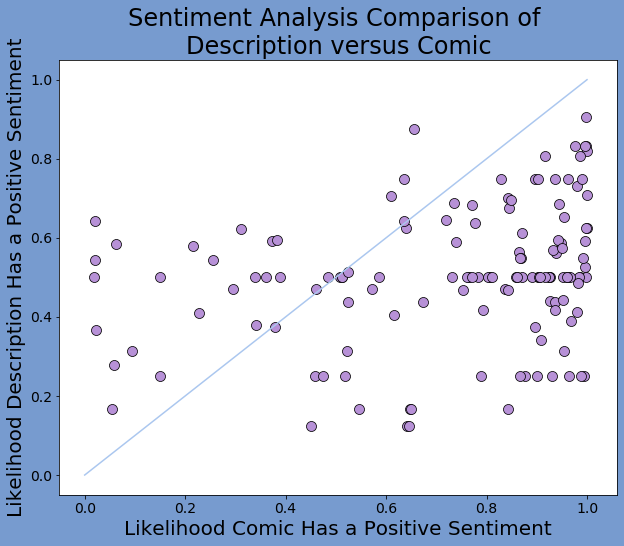

In [430]:
plt.figure(figsize=(10,8), facecolor='#779BCF', clear=True)
sns.scatterplot(df.comic_ppos, df.word_ppos, color='#B791D7', 
                sizes = 50, edgecolor='black', s=100
               )
plt.plot([0,1], [0,1], color='#ABC7EF')
plt.xlabel('Likelihood Comic Has a Positive Sentiment', fontsize=20)
plt.ylabel('Likelihood Description Has a Positive Sentiment', fontsize=20)
plt.title('Sentiment Analysis Comparison of \nDescription versus Comic', fontsize=24)
plt.yticks([0, .2, .4, .6, .8, 1.0], fontsize=14)
plt.xticks([0, .2, .4, .6, .8, 1.0], fontsize=14);

In [470]:
vect = CountVectorizer(max_df=0.87, max_features=2000, min_df=1, ngram_range=(1,2), stop_words='english')
vect.fit(df.all_words)
word_freq = vect.transform(df.all_words)
word_freq_cv = pd.DataFrame(word_freq.toarray(),
                                 columns = vect.get_feature_names())

In [473]:
features = ['comic_ppos', 'characters', 'word_count']
prep_features = word_freq_cv.join(df[features])

In [474]:
prep_features

,50,able,absorb,accept,accurate,acidic,action,actions,activity,actually,...,young strength,young tired,young walks,young wants,young young,youngling,youngling feel,comic_ppos,characters,word_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.844506,2,43
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.45829,1,11
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.484471,2,30
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.997806,3,32
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.975845,2,27
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.63988,2,44
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.980772,4,33
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.943391,2,30
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.954976,3,46
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.925944,3,46


In [617]:
train_samples = list(range(38, 138))
train_samples.reverse()

In [618]:
desc_list = []
train_data = pd.DataFrame(columns = ['is_word', 'location', 'length', 
                                     'panel', 'count', 'comic', 
                                     'sentiment', 'comic_sent', 'characters',
                                     'word_count'
                                    ])
for comic in train_samples:   
    count = 1
    print(comic)
    desc_list.append(df['word'][comic].strip().lower())
    for panel in range(1,5):
        word_list = tokenizer.tokenize(df['panel_' + str(panel)][comic])
        all_words = df['all_words'][comic]
        
        for word in word_list:
            data = {}
            if word.lower() == df['word'][comic].strip().lower():
                data['is_word'] = 1
            else:
                data['is_word'] = 0
                
            data['location'] = count
            count += 1
            data['length'] = len(word)
            data['panel'] = panel
            data['count'] = all_words.count(word)
            data['comic'] = comic
            opinion = TextBlob(word, analyzer=NaiveBayesAnalyzer())
            sent = opinion.sentiment
            data['sentiment'] = sent.p_pos
            data['comic_sent'] = df['comic_ppos'][comic]
            data['characters'] = df['characters'][comic]
            data['word_count'] = df['word_count'][comic]
            train_data = train_data.append(data, ignore_index = True)

137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38


In [607]:
# train_data.to_csv('./train_data.csv')
train_data = pd.read_csv('./train_data.csv')

In [714]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)

In [717]:
train_data.columns

Index(['is_word', 'location', 'length', 'panel', 'count', 'comic', 'sentiment',
       'comic_sent', 'characters', 'word_count'],
      dtype='object')

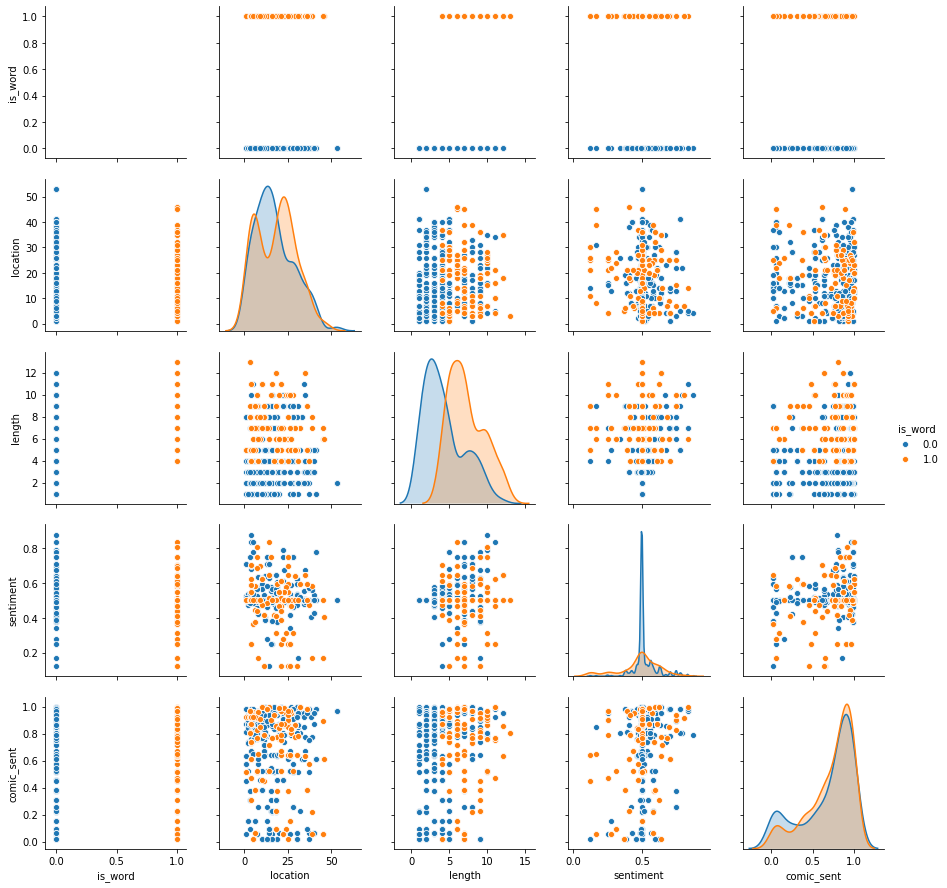

In [722]:
sns.pairplot(df_train.drop(['comic', 'characters', 'word_count', 'panel', 'count'], axis=1), hue='is_word')

In [601]:
min_train_data = train_data[train_data['is_word'] == 1]
maj_train_data = train_data[train_data['is_word'] == 0]      

In [599]:
min_train_data.shape

(2609, 10)

In [600]:
maj_train_data.shape

(2609, 10)

In [590]:
102/(102+2609)

0.03762449280708226

In [606]:
# Utilized code from https://towardsdatascience.com/comparing-different-classification-machine-learning-models-for-an-imbalanced-dataset-fdae1af3677f
# to resample data

maj_train_data = resample(maj_train_data, 
                                 replace=True,     
                                 n_samples=500,    
                                 random_state=42)
min_train_data = resample(min_train_data, 
                                 replace=True,     
                                 n_samples=250,    
                                 random_state=42)
df_train = pd.concat([maj_train_data, min_train_data])
print (df_train.is_word.value_counts())

0.0    500
1.0    250
Name: is_word, dtype: int64


In [570]:
test_samples = list(range(0, 38))
test_samples.reverse()

In [691]:
desc_list = []
# test_data = pd.DataFrame(columns = ['is_word', 'location', 'length', 
#                                      'panel', 'count', 'comic', 
#                                      'sentiment', 'comic_sent', 'characters',
#                                      'word_count'
#                                     ])
word_list_test =[]
is_word_list = []
for comic in test_samples:   
#     count = 1
#     print(comic)
    for panel in range(1,5):
        word_list = tokenizer.tokenize(df['panel_' + str(panel)][comic])
#         all_words = df['all_words'][comic]
        
        
        
        for word in word_list:
#             data = {}
             word_list_test.append(word.lower())
             if word.lower() == df['word'][comic].strip().lower():
                 is_word_list.append(1)
             else:
                 is_word_list.append(0)
#             data['location'] = count
#             count += 1
#             data['length'] = len(word)
#             data['panel'] = panel
#             data['count'] = all_words.count(word)
#             data['comic'] = comic
#             opinion = TextBlob(word, analyzer=NaiveBayesAnalyzer())
#             sent = opinion.sentiment
#             data['sentiment'] = sent.p_pos
#             data['comic_sent'] = df['comic_ppos'][comic]
#             data['characters'] = df['characters'][comic]
#             data['word_count'] = df['word_count'][comic]

#             test_data = test_data.append(data, ignore_index = True)

In [681]:
test_data['word'] = word_list_test

In [692]:
test_data['is_word'] = is_word_list

In [695]:
test_data.to_csv('./test_data3.csv')

In [670]:
test_data = pd.read_csv('./test_data3.csv')
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [657]:
X_train = df_train.drop(['is_word', 'comic'], axis=1)
y_train = df_train['is_word']
X_test = test_data.drop(['is_word', 'comic', 'word'], axis=1)
y_test = test_data['is_word']

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

rf = RandomForestClassifier()

gs_param = {
    'criterion':['gini'], 
    'n_estimators' : [55, 60, 75],
    'max_depth':[6, 8, 10], 
    'min_samples_split':[2],
    'min_weight_fraction_leaf' : [0],
    'max_features': [4, 5, 6],
    'max_leaf_nodes' : [25],
    'bootstrap':[True]
}
gs = GridSearchCV(rf, gs_param, cv=2)
gs.fit(X_train, y_train)

# print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Train f1 score: {f1_score(y_train, gs.predict(X_train))}')
# print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')
print(f'Train accuracy score: {accuracy_score(y_train, gs.predict(X_train))}')
gs.best_params_

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

Data with input dtype object were all converted to float64 by StandardScaler.



Train f1 score: 0.9531568228105907
Train accuracy score: 0.9693333333333334


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 6,
 'max_leaf_nodes': 25,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 55}

In [939]:
X_train = df_train.drop(['is_word', 'comic'], axis=1)
y_train = df_train['is_word']


ss = StandardScaler()
X_train = ss.fit_transform(X_train)

dtr = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=2,
    max_features=6,
    max_leaf_nodes=25, 
    min_weight_fraction_leaf=0
)

abr = AdaBoostRegressor(base_estimator = dtr)
abr.fit(X_train, y_train)
# print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Train f1 score: {f1_score(y_train, abr.predict(X_train))}')
# print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')
print(f'Train accuracy score: {accuracy_score(y_train, abr.predict(X_train))}')
gs.best_params_

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [700]:
X_test = test_data.drop(['is_word', 'comic', 'word', 'pred'], axis=1)
y_test = test_data['is_word']
X_test = ss.transform(X_test)

In [771]:
test_data['pred'] = gs.predict_proba(X_test)

In [823]:
test_data[['preds', 'word', 'comic']].groupby('comic').max()

,preds,word
comic,,
0.0,0.985175,you
1.0,0.981862,you
2.0,0.985175,wonderful
3.0,0.982917,your
4.0,0.984815,you
5.0,0.969456,your
6.0,0.970338,what
7.0,0.873067,you
8.0,0.985175,young


In [879]:
test_data['preds'] = preds
test_data[['preds', 'word', 'comic']][(test_data.comic == 5)].sort_values('preds').tail(1)['word']

1381    time
Name: word, dtype: object

In [930]:
last_com = 0
pred_words = []
highest_pred = 0
preds = []
highest_pred_word = ''
stop_words = list(stopwords.words('english'))
stop_words.extend(['for', 'me', 'i', 'am', 'this', 'just', 'you', 'the', 'as', 'our', 'to', 'your', 'us', 'ok'])

for i in range(test_data.shape[0]):
    print(i)
    
    word = test_data['word'][i].lower()
    
    print(word)
    
    if word in stop_words:
        pred = 0
        preds.append(pred)
    
    elif word in desc_list:
        pred = 0
        preds.append(pred)
    
    elif len(word) < 5:
        pred = 0
        preds.append(pred)
        
    else: 
        pred = test_data['pred'][i]
        preds.append(pred)
    
    
    if pred >= highest_pred:
        print(last_com, pred, word)
        highest_pred = pred
        highest_pred_word = word

    if test_data['comic'][i] > last_com:
        pred_words.append(highest_pred_word)
        highest_pred = 0 
        highest_pred_word = ''
        last_com += 1
    
    print(word)
        

0
gratitude
0 0.0 gratitude
gratitude
1
for
1 0 for
for
2
agreeing
2 0.0 agreeing
agreeing
3
to
3 0 to
to
4
this
4 0 this
this
5
romantic
5 0.0 romantic
romantic
6
sustenance
6 0.44780235820568215 sustenance
sustenance
7
appointment
7 0.5308242706103374 appointment
appointment
8
gratitude
8 0.6652034791760469 gratitude
gratitude
9
for
9 0 for
for
10
purchasing
10 0.0 purchasing
purchasing
11
sustenance
11 0.42707945116795076 sustenance
sustenance
12
for
12 0 for
for
13
me
13 0 me
me
14
this
14 0 this
this
15
being
15 0 being
being
16
our
16 0 our
our
17
first
17 0.0 first
first
18
appointment
18 0.519994764644866 appointment
appointment
19
i
19 0 i
i
20
am
20 0 am
am
21
quite
21 0.0 quite
quite
22
nervous
22 0.6998760418235704 nervous
nervous
23
as
23 0 as
as
24
am
24 0 am
am
25
i
25 0 i
i
26
the
26 0 the
the
27
crucial
27 0.0 crucial
crucial
28
action
28 0.6006960032287167 action
action
29
is
29 0 is
is
30
just
30 0 just
just
31
exist
31 0.0 exist
exist
32
as
32 0 as
as
33
you
33 0 yo

is
is
593
a
a
594
gravity
gravity
595
induced
induced
596
sustenance
sustenance
597
releaser
releaser
598
it
it
599
releases
releases
600
the
the
601
sustenance
sustenance
602
and
and
603
the
the
604
planet
planet
605
pulls
pulls
606
it
it
607
down
down
608
the
the
609
planet
planet
610
failed
failed
611
us
us
612
mmm
mmm
613
i
i
614
smell
smell
615
delicious
delicious
616
sweet
sweet
617
disks
disks
618
actually
actually
619
no
no
620
this
this
621
is
is
622
the
the
623
scent
scent
624
of
of
625
this
this
626
primitive
primitive
627
light
light
628
source
source
629
impressive
impressive
630
scent
scent
631
replication
replication
632
right
right
633
so
so
634
impressive
impressive
635
so
so
636
so
so
637
impressive
impressive
638
bsss
bsss
639
observe
observe
640
greetings
greetings
641
tiny
tiny
642
being
being
643
your
your
644
young
young
645
being
being
646
started
started
647
it
it
648
we
we
649
do
do
650
not
not
651
pose
pose
652
a
a
653
threat
threat
654
to
to
655
your
your
65

1180
narratives
narratives
1181
in
in
1182
the
the
1183
warm
warm
1184
cycles
cycles
1185
we
we
1186
observe
observe
1187
exciting
exciting
1188
narratives
narratives
1189
in
in
1190
which
which
1191
being
being
1192
punch
punch
1193
each
each
1194
other
other
1195
ok
ok
1196
in
in
1197
the
the
1198
cold
cold
1199
cycles
cycles
1200
we
we
1201
observe
observe
1202
dramatic
dramatic
1203
narratives
narratives
1204
in
in
1205
which
which
1206
beings
beings
1207
yell
yell
1208
at
at
1209
each
each
1210
other
other
1211
ah
ah
1212
then
then
1213
they
they
1214
give
give
1215
a
a
1216
tiny
tiny
1217
statue
statue
1218
to
to
1219
the
the
1220
beings
beings
1221
who
who
1222
yelled
yelled
1223
most
most
1224
believably
believably
1225
wow
wow
1226
what
what
1227
was
was
1228
your
your
1229
activity
activity
1230
today
today
1231
i
i
1232
have
have
1233
been
been
1234
handscratching
handscratching
1235
the
the
1236
creature
creature
1237
for
for
1238
an
an
1239
unknown
unknown
1240
number
numb

In [931]:
test_data['preds'] = preds


In [932]:
rf_preds = []
for i in range(37):
    line = test_data[['preds', 'word', 'comic']][(test_data.comic == i)].sort_values('preds').tail(1)['word'].to_string()
    rf_preds.append(line[line.find(' '):].strip())

In [933]:
pred_df['rf_predict'] = None
pred_df['rf_predict'] = rf_preds

In [934]:
pred_df

,word,rf_predict
0,Employ,activities
1,Regulations,correct
2,Repetition,portion
3,Dread,ready
4,Extinguished,plummet
5,Install,mouth
6,Logical,observe
7,Unique,creating
8,Chaos,young
9,Activity,today


In [940]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [943]:
words_df['count'].sort_values().tail(5)

yes           15
sustenance    23
want          23
observe       25
ok            28
Name: count, dtype: int64

In [947]:
df['all_words']

0      Why should we employ you? I excel at many acti...
1      My home, my regulations. Sweet disks EwLifegiv...
2      Ingest a minuscule portion? Ok, but I am only ...
3      I am ready to observe your festive disguises.I...
4      Cease. Plummet. Rotate. Rotate until you are e...
5      Time to take a few of your mouth stones. Why? ...
6      A charming aged structure. Secluded in vegetat...
7      Direct dispenser access. We control our bevera...
8      The young being’s strength has increased. Yes!...
9      What was your activity today? I have been hand...
10     This is where we observe narratives. In the wa...
11     I love observing the massive liquid.I could ob...
12     Do you ever imagine what if the universe were ...
13     Heat increments are low. This day will be plea...
14     This is a gift with the implicit understanding...
15     I will relay steering instructions to you in n...
16     So… we transfer momentum from the low surface ...
17     This scent is repulsive.

In [36]:
df['all_words']
text = " ".join(post for post in (df['all_words'])) 

In [41]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [45]:
newcolors = ['#F7BCEA', '#C089E6', 
             '#79C9E0', '#A2EDE1', '#FCC3D4', 
             '#D27BA6', '#E2F1F8',
             '#FDFBD4', '#F6FEFF', '#EFD3B8']
newcmp = ListedColormap(newcolors)

(-0.5, 599.5, 349.5, -0.5)

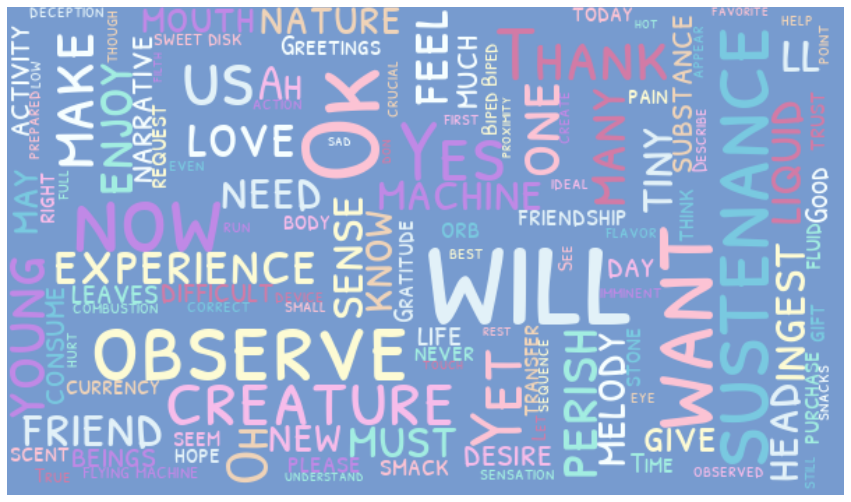

In [46]:
wordcloud = WordCloud(font_path='./font/PatrickHandSC-Regular.ttf',
                      max_font_size=120, 
                      max_words=120, 
                      prefer_horizontal=0.6,
                      width=600,
                      height=350,
                      background_color='#779BCF', 
                      colormap=newcmp, 
                      contour_width=5).generate(text)
plt.figure(figsize= [15,9])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
